In [17]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

from sae_cooccurrence.utils.set_paths import get_git_root

In [4]:
git_root = get_git_root()

In [5]:
# load a thresholded matrix
# Load the thresholded matrix from npz file
thresholded_matrix = np.load(
    f"{git_root}/results/gpt2-small/res-jb-feature-splitting/blocks_8_hook_resid_pre_24576/thresholded_matrices/thresholded_matrix_1_5.npz"
)["arr_0"]

node_df = pd.read_csv(
    f"{git_root}/results/gpt2-small/res-jb-feature-splitting/blocks_8_hook_resid_pre_24576/dataframes/node_info_df_1_5.csv"
)

In [30]:
# make thresholded matrix upper triangular
thresholded_matrix = np.triu(thresholded_matrix)

In [31]:
subgraph_id = 125
subgraph_nodes = node_df[node_df["subgraph_id"] == subgraph_id]["node_id"].tolist()
# arrange nodes in ascending order
subgraph_nodes = sorted(subgraph_nodes)

In [46]:
subgraph_df = node_df[node_df["subgraph_id"] == subgraph_id]
subgraph_df = subgraph_df[["node_id", "feature_activations"]]
subgraph_df.head()

,node_id,feature_activations
360,19054,928.0
361,5748,926.0
362,1179,777.0
363,125,655.0
364,734,750.0


In [32]:
subgraph_nodes

[125, 734, 1179, 5748, 19054]

In [33]:
subgraph_matrix = thresholded_matrix[subgraph_nodes, :][:, subgraph_nodes]
subgraph = nx.from_numpy_array(subgraph_matrix)

# keep the node ids as the node names

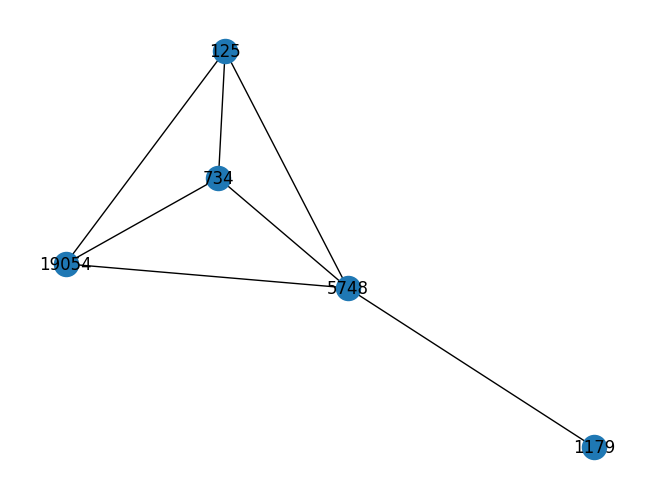

In [34]:
# Create a mapping of new indices to original node IDs
node_labels = {i: subgraph_nodes[i] for i in range(len(subgraph_nodes))}

# plot the graph with the original node IDs as labels
nx.draw(subgraph, with_labels=True, labels=node_labels)
plt.show()

In [41]:
node_df[node_df["node_id"] == 125]

,node_id,activity_threshold,subgraph_id,subgraph_size,feature_activations,top_10_tokens,neuronpedia_link,density,max_avg_degree_ratio,avg_clustering,diameter,single_node_score,hub_spoke_score,strongly_connected_score,linear_score,quicklist_link
363,125,1.5,125,5,655.0,"['daq', 'Uk', 'zx', 'wcs', 'zn', 'chwitz', 'yx...",https://neuronpedia.org/gpt2-small/8-res_fs245...,0.7,1.428571,0.7,2,0.0,0.556967,0.807088,0.635945,https://neuronpedia.org/quick-list/?name=tempo...


KeyboardInterrupt: 

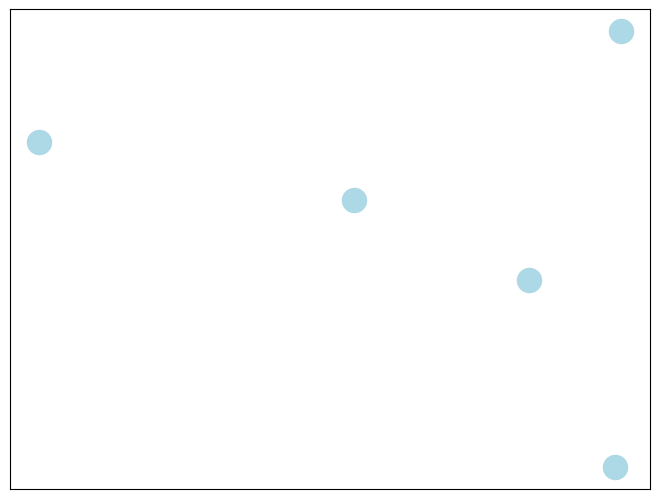

In [50]:
# Create a mapping of new indices to original node IDs
node_labels = {i: subgraph_nodes[i] for i in range(len(subgraph_nodes))}

# Get edge weights from the subgraph_matrix
edge_weights = [subgraph_matrix[u][v] for (u, v) in subgraph.edges()]

# Plot the graph with weighted edges
nx.draw(
    subgraph,
    with_labels=True,
    labels=node_labels,
    width=edge_weights * 1000000,  # Set edge thickness based on weights
    edge_color="gray",  # Optional: makes edges easier to see
    node_color="lightblue",  # Optional: better node visibility
)
plt.show()